## Imports

In [11]:
import numpy as np
import pandas as pd
import seaborn as sn #necessary to create correlation matrix

In [12]:
#df = pd.read_excel('data/fluxo_escolar_por_escola_2021.xlsx') 'output/fluxo_escolar_filtered_2021.xlsx'

df_correct_percentages = pd.read_excel('data/fluxo_escolar_filtered_correct_percentages.xlsx')
df_correct_percentages_2021 = df_correct_percentages.loc[df_correct_percentages['ano'] == 2021]
df_correct_percentages_2021

#df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/fluxo_escolar_por_escola_2021.xlsx'

# Tratamento (entrega 2)

## Renaming columns

In [6]:
columns_renamed = {
    'ANO_LETIVO':'ano', 
    'NM_MUNICIPIO':'municipio', 
    'NM_COMPLETO_ESCOLA':'escola', 
    'APR_3':'aprovado', 
    'REP_3':'reprovado', 
    'ABA_3':'abandono'
}
df = df.rename(columns=columns_renamed)

In [7]:
# df = df.dropna()
df.head()

,ano,NM_DIRETORIA,municipio,CD_REDE_ENSINO,CD_ESCOLA,escola,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.0,0.0,0.0,99.56,0.44,0.0,94.0,2.0,4.0
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.0,0.0,0.0,100.00,0.00,0.0,100.0,0.0,0.0
4,2021,AMERICANA,AMERICANA,1,17152,MAURA ARRUDA GUIDOLIN PROFA,8,100.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


## Drop rows that contains NaN and zeros for 'aprovado' and 'reprovado' columns

In [8]:
df_cleaned = df.loc[(df['aprovado'] > 0) | (df['reprovado'] > 0)]
df_cleaned.head()

,ano,NM_DIRETORIA,municipio,CD_REDE_ENSINO,CD_ESCOLA,escola,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.00,0.00,0.0,99.56,0.44,0.0,94.00,2.00,4.00
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
6,2021,AMERICANA,AMERICANA,1,17176,MAGI MONSENHOR,8,94.74,5.26,0.0,93.35,6.65,0.0,79.82,19.29,0.89


### Applying county name corrections base on comparing above

In [12]:
unique_county_values = df['municipio'].unique().tolist()
sp_counties_df = pd.read_excel('data/ibge_sp_counties_data.xlsx')
sp_counties_list = sp_counties_df.loc[:, 'Município'].tolist()

import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

sp_counties_normalized_list = [ strip_accents(i).replace(';', '').upper() for i in sp_counties_list]

diff1 = set(sp_counties_normalized_list).difference(set(unique_county_values))
diff2 = set(unique_county_values).difference(set(sp_counties_normalized_list))

print(f'''Comparing results:\n
sp_counties_normalized_list values that do not in unique_county_values: {diff1 or None}
unique_county_values values that do not in sp_counties_normalized_list: {diff2 or None}''')

Comparing results:

sp_counties_normalized_list values that do not in unique_county_values: {'FLORINEA', 'SANTANA DE PARNAIBA', 'BIRITIBA MIRIM'}
unique_county_values values that do not in sp_counties_normalized_list: {'BIRITIBA-MIRIM', 'FLORÍNEA'}


## Normalizing counties

In [14]:
df_cleaned['municipio'] = df_cleaned['municipio'].replace('BIRITIBA-MIRIM', 'BIRITIBA MIRIM')
df_cleaned['municipio'] = df_cleaned['municipio'].replace('MOGI-GUACU', 'MOGI GUACU')
df_cleaned['municipio'] = df_cleaned['municipio'].replace('MOGI-MIRIM', 'MOGI MIRIM')
# Note: 'SANTANA DE PARNAIBA' is a county that is not in case study dataframe
#df_cleaned.drop(columns=['Unnamed: 0'])
#df_cleaned.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ano,NM_DIRETORIA,municipio,CD_REDE_ENSINO,CD_ESCOLA,escola,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,aprovado,reprovado,abandono
0,2021,PIRAJU,PIRAJU,1,34320,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
1,2021,PIRAJU,PIRAJU,1,34344,QUINZINHO CAMARGO PREFEITO,8,0.00,0.00,0.0,99.56,0.44,0.0,94.00,2.00,4.00
2,2021,PIRAJU,PIRAJU,1,34356,NHONHO BRAGA CORONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
3,2021,PIRAJU,PIRAJU,1,34459,ATALIBA LEONEL,8,0.00,0.00,0.0,100.00,0.00,0.0,100.00,0.00,0.00
6,2021,AMERICANA,AMERICANA,1,17176,MAGI MONSENHOR,8,94.74,5.26,0.0,93.35,6.65,0.0,79.82,19.29,0.89


### Exporting cleaned dataset

In [ ]:
df_cleaned.to_excel('output/fluxo_escolar_2021_cleaned.xlsx')

# Caracterização (Entrega 3)

In [22]:
#'output/fluxo_escolar_filtered_2021.xlsx'
df_filtered_2021 = pd.read_excel('data/fluxo_escolar_filtered_correct_percentages.xlsx')
df_filtered_2021

,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono
16702,26285,2021,PIRAJU,JOAQUIM GUILHERME MOREIRA PORTO DOUTOR,100.00,0.00,0.00
16703,26286,2021,PIRAJU,QUINZINHO CAMARGO PREFEITO,94.00,2.00,4.00
16704,26287,2021,PIRAJU,NHONHO BRAGA CORONEL,100.00,0.00,0.00
16705,26288,2021,PIRAJU,ATALIBA LEONEL,100.00,0.00,0.00
16706,26292,2021,ITABERA,ALBERTO PEREIRA PROFESSOR,100.00,0.00,0.00
...,...,...,...,...,...,...,...
20346,31471,2021,BAURU,JOAQUIM RODRIGUES MADUREIRA,99.71,0.29,0.00
20347,31473,2021,BAURU,CHRISTINO CABRAL PROF,99.73,0.27,0.00
20348,31475,2021,BAURU,CARLOS CHAGAS DR,99.77,0.00,0.23
20349,31476,2021,BAURU,ARMINDA SBRISSIA IRMA,98.58,0.00,1.42


## Creating Standard bypass

In [18]:
std_reprovado = df_filtered_2021['reprovado'].std()
std_aprovado = df_filtered_2021['aprovado'].std()

print(f"Desvio padrão\nReprovado: { str(std_reprovado)} \nAprovado: {str(std_aprovado)}")

Desvio padrão
Reprovado: 3.8746897198564874 
Aprovado: 4.348938693386104


## Creating Central Tendency 

In [19]:
mean = df_filtered_2021['reprovado'].mean() #media
median = df_filtered_2021['reprovado'].median() #mediana
quantile = df_filtered_2021['reprovado'].quantile()
mode = df_filtered_2021['reprovado'].mode().iloc[0]

print(f"Mode: { str(mode)} \nMedian: {str(median)} \nQuantile: {str(quantile)} \nMean: {str(mean)}")

Mode: 0.0 
Median: 0.0 
Quantile: 0.0 
Mean: 1.7151767607563717


### Creating a Correlation Matrix

/tmp/ipykernel_22331/3560998729.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_correct_percentages_2021.corr()


<AxesSubplot: >

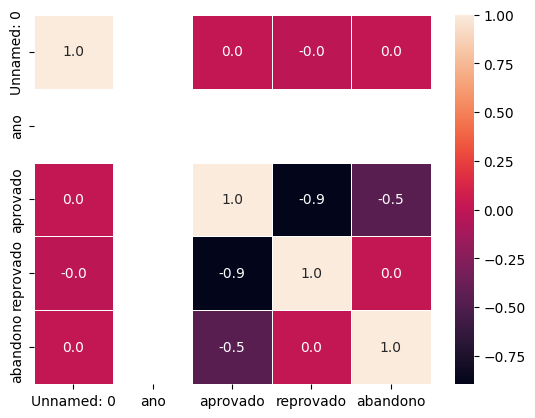

In [20]:
# correlation analysis
correlation = df_filtered_2021.corr()

# correlation matrix plot
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot